
##  Program in Python to Calculate the Output of Simple Neuron using Python
## Aim: To build a simple perceptron to predict  the transaction as Fraudelent or not

In [ ]:
import numpy as np

In [ ]:
#1 .Defining the input, target, weights, learning_rate
X = np.array([[0,10,36],[0,12,100],[1,15,20],[0,16,5],[0,5,15]])
y = np.array([[1],[1],[0],[0],[0]])
weights = np.array([[.5], [.5], [.2]])
alpha = 0.001
print("Input:\n ", X )
print("\nTarget:\n ", y)
print("\nWeights:\n ", weights)
print("\nAlpha: ", alpha)
error = []

# 2. New Test_data
new_X = np.array([[5,10,5]])
new_y = np.array([0])
print("\nTest_X: \n ", new_X)
print("\nTest_y: \n ", new_y)

# 3. Threshold Value
threshold = lambda z : 0 if z<0 else 1

# 4. Calculating the Net Input
z = np.sum(np.dot(X, weights))
print("\nNet Input: ", z)

# 5. Calculating the error
err = new_y - threshold(z)
error.append(err)
print("\nError: ", err)

# 6. Updating the weights
weights += alpha* err * new_X.T
print("\nUpdated Weights:\n ", weights)

Input:
  [[  0  10  36]
 [  0  12 100]
 [  1  15  20]
 [  0  16   5]
 [  0   5  15]]

Target:
  [[1]
 [1]
 [0]
 [0]
 [0]]

Weights:
  [[0.5]
 [0.5]
 [0.2]]

Alpha:  0.001

Test_X: 
  [[ 5 10  5]]

Test_y: 
  [0]

Net Input:  64.7

Error:  [-1]

Updated Weights:
  [[0.495]
 [0.49 ]
 [0.195]]


In [ ]:
# Evaluation
new_x = np.array([[5,10,5], [0,0,0],[12,10,36], [85,125,100]])
new_yy = np.array([[0],[0],[1],[0]])
for i, j in zip(new_x, new_yy):
  res = np.dot(i, weights)
  print(i, res, threshold(res))

[ 5 10  5] [8.35] 1
[0 0 0] [0.] 1
[12 10 36] [17.86] 1
[ 85 125 100] [122.825] 1


### Implementing using functions

Creating a numpy array of 5 rows and three features depicting the transactions outside US, Transactions done within 12 hours and the amount of transaction.
Target Variable is a binary class where 1 represents Fraudulent Transaction and 0 represents non-fraudulent transaction.

In [ ]:
input = np.array([[0,10,36],[0,12,100],[1,15,20],[0,16,5],[0,5,15]])
target = np.array([[1],[1],[0],[0],[0]])

In [ ]:
class Perceptron:
  def __init__(self, input, target):
    self.input =input
    self.target =target
    self.weights = np.array([[0.2],[0.2], [0.2]])
    self.error_list = []
    self.alpha1 = 0.001
    self.epochs =25000
    self.epoch_list =[]
    self.accuracy_list =[]

  def net_input(self):
    self.z = np.sum(np.dot(self.input, self.weights))+1
    return (self.z)

  def threshold(self, z):
     return np.where(self.z>= 0, 1, -1)

  def updation(self):
    self.err = self.target - self.z
    self.weights =self.weights + np.dot(self.input.T,self.alpha1)
    return self.weights

  def train(self):
    for i in range(self.epochs):
      self.net_input()
      self.updation()
      self.error_list.append(np.average(self.err))
      self.epoch_list.append(self.epochs)

  def test(self, new_inputs):
    result = np.dot(new_inputs, self.weights)
    return self.threshold(result)

  def score(self):
   misclassified = 0
   for i in range(50):
      for xi, target in zip(self.input, self.target):
        output =self.threshold(xi)
        if target!=output:
          misclassified+=1
          total_data = len(self.input)
          self.accuracy =(total_data-misclassified)/total_data
          self.accuracy_list.append(self.accuracy)
      return self.accuracy

We are testing the perceptron on the new test data, which are passed as the parameters to the test() function.

The Actual Output of the two new records was 1 and 0 respectively. But the predicted output of both is 1.

In [ ]:
P =Perceptron(input, target)
P.train()
inp1 = np.array([5,10,5])
inp2 = np.array([12,10,36])
print("Predicted: ", P.test(inp1), "Actual: 1")
print("Predicted: ", P.test(inp2), "Actual: 0")




Predicted:  1 Actual: 1
Predicted:  1 Actual: 0


The updated weights

In [ ]:
print("Weights: ", P.updation())

Weights:  [[2.00000e-01 2.00000e-01 2.52010e+01 2.00000e-01 2.00000e-01]
 [2.50210e+02 3.00212e+02 3.75215e+02 4.00216e+02 1.25205e+02]
 [9.00236e+02 2.50030e+03 5.00220e+02 1.25205e+02 3.75215e+02]]


The Score of the model is calculated by taking number of misclassified points divided by the total number of data points.

In [ ]:
print("Accuracy: ", P.score())

Accuracy:  0.4


Plot of Error and Epochs

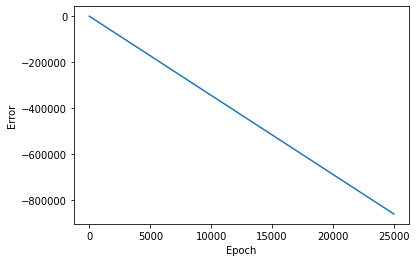

In [ ]:
import matplotlib.pyplot as plt
plt.plot(P.error_list)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

Conclusion: We have built a simple perceptron model by training the model on 5 records and testing it on 2 records. For 50 epochs, the accuracy score is 0.4. we can see the decrease in the error as the number of epochs increases.